In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm

In [2]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [3]:
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators',Learning_rate_=[0.2,0.4,0.6,1]):

    lines_array=['solid','--', '-.', ':']

    N_estimators=[n for n in range(1,100)]
    
    times=20
    train_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))
    test_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))


    #Iterate through different number of Learning rate  and average out the results  
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            for j,lr in enumerate(Learning_rate_):


                model = AdaBoostClassifier(n_estimators=n_estimators+1,random_state=0,learning_rate=lr)


                model.fit(X_train,y_train)



                Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  model)



                train_acc[n,j,n_estimators-1]=Accuracy['train Accuracy']
                test_acc[n,j,n_estimators-1]=Accuracy['test Accuracy']




    fig, ax1 = plt.subplots()
    mean_test=test_acc.mean(axis=0)
    mean_train=train_acc.mean(axis=0)
    ax2 = ax1.twinx()

    for j,(lr,line) in enumerate(zip(Learning_rate_,lines_array)): 

        ax1.plot(mean_train[j,:],linestyle = line,color='b',label="Learning rate "+str(lr))
        ax2.plot(mean_test[j,:],linestyle = line, color='r',label=str(lr))

    ax1.set_ylabel('Training accuracy',color='b')
    ax1.set_xlabel('No of estimators')
    ax1.legend()
    ax2.set_ylabel('Testing accuracy', color='r')
    ax2.legend()
    plt.show()

In [4]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [6]:
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

In [7]:
y = churn_df['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (140, 7) (140,)
Test set (60, 7) (60,)


In [9]:
from sklearn.ensemble import AdaBoostClassifier

In [10]:
n_estimators=5
random_state=0

In [11]:
model = AdaBoostClassifier(n_estimators=n_estimators,random_state=random_state)

In [12]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred 

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [13]:
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.7642857142857142}


In [14]:
[ ("for weak classifiers {} the we get ".format(i+1),get_accuracy(X_train, X_test, y_train, y_test,  weak_classifiers)) for i,weak_classifiers in enumerate(model.estimators_)]

C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\skle

[('for weak classifiers 1 the we get ',
  {'test Accuracy': 0.7, 'train Accuracy': 0.7428571428571429}),
 ('for weak classifiers 2 the we get ',
  {'test Accuracy': 0.6, 'train Accuracy': 0.6214285714285714}),
 ('for weak classifiers 3 the we get ',
  {'test Accuracy': 0.6333333333333333, 'train Accuracy': 0.6642857142857143}),
 ('for weak classifiers 4 the we get ',
  {'test Accuracy': 0.35, 'train Accuracy': 0.4642857142857143}),
 ('for weak classifiers 5 the we get ',
  {'test Accuracy': 0.43333333333333335, 'train Accuracy': 0.5})]

In [15]:
n_estimators=100
random_state=0

In [16]:
model= AdaBoostClassifier(n_estimators=n_estimators, random_state=random_state)

In [17]:
model.fit(X_train, y_train)
ypred = model.predict(X_test)

In [18]:
print(get_accuracy(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model=model))

{'test Accuracy': 0.7333333333333333, 'train Accuracy': 1.0}


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [21:00<00:00, 63.01s/it]


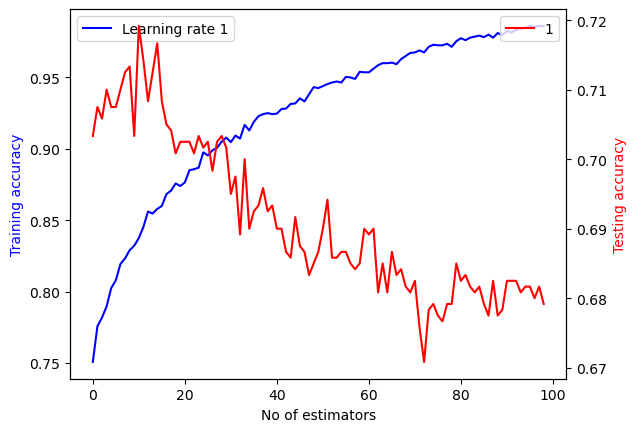

In [19]:
get_accuracy_bag(X,y,title="Training and Test Accuracy vs Weak Classifiers",Learning_rate_=[1],times=20,xlabel='Number Estimators')

In [20]:
n_estimators=100
random_state=0
learning_rate=0.7

In [21]:
model = AdaBoostClassifier(n_estimators=n_estimators,random_state=random_state,learning_rate=learning_rate)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.75, 'train Accuracy': 0.95}


In [ ]:
get_accuracy_bag(X,y,title="Training and Test Accuracy vs Weak Classifiers",Learning_rate_=[0.2,0.4,0.6,1],times=20,xlabel='Number Estimators')

In [22]:
from sklearn.svm import SVC

In [23]:
base_estimator=SVC(kernel='rbf',gamma=1)

In [24]:
base_estimator.fit(X_train, y_train)

print(get_accuracy(X_train, X_test, y_train, y_test, base_estimator))

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 1.0}


In [25]:
base_estimator.predict_proba(X_train)

AttributeError: predict_proba is not available when  probability=False

In [26]:
algorithm='SAMME'

In [27]:
model = AdaBoostClassifier(n_estimators=5, base_estimator=base_estimator, learning_rate=1, algorithm=algorithm)

In [28]:
model.fit(X_train, y_train)

C:\Users\Muhammad Umer Khan\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(gamma=1),
                   learning_rate=1, n_estimators=5)

In [32]:
y_pred = model.predict(X_test)

In [34]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.6857142857142857}


In [35]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")

df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [36]:
df= df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [37]:
X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = df['Class']
X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
model = AdaBoostClassifier()
model.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [41]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
             'n_estimators' : [2*n+1 for n in range(10)],
              'algorithm':['SAMME', 'SAMME.R']}                

param_grid 

{'learning_rate': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'algorithm': ['SAMME', 'SAMME.R']}

In [42]:
search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy').fit(X_train, y_train)

In [43]:
search.best_score_

0.9689074228523771

In [44]:
search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 17}

In [45]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9708029197080292, 'train Accuracy': 0.9725274725274725}


In [46]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [47]:
X = [x for x in df.columns if x!='Drug']
X

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [48]:
X = df[X]
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [49]:
y = df['Drug']

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [53]:
for i in X.columns:
    if X[i].dtype == 'object':
        X[i] = le.fit_transform(X[i])

C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_12968\1233590146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = le.fit_transform(X[i])
C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_12968\1233590146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = le.fit_transform(X[i])
C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_12968\1233590146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
dtypes: float64(1), int32(3), int64(1)
memory usage: 5.6 KB


In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [57]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(10)],
             'n_estimators' : [2*n+1 for n in range(10)],
              'algorithm':['SAMME', 'SAMME.R']}                

param_grid 


{'learning_rate': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'algorithm': ['SAMME', 'SAMME.R']}

In [58]:
model = AdaBoostClassifier()

In [59]:
search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3).fit(X_train, y_train)

In [60]:
search.best_score_

0.8625669694852084

In [61]:
search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.9, 'n_estimators': 7}

In [62]:
print(get_accuracy(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model=search.best_estimator_))

{'test Accuracy': 0.775, 'train Accuracy': 0.85}
